In [1]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TEMPERATURES = [1]
SIMULATIONS = [2, 4]
TRIAL = 10

env1 = StatelessGym.make('CartPole-v1')
env2 = StatelessGym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

agent = MCTS.mcts_agent(horizon=30)

experiment1 = Experiment(env1, agent, temperatures=TEMPERATURES, simulations=SIMULATIONS, trial=TRIAL, experiment_name="Cartpole Base MCTS")

Simulation =  2 	Mean Cumulative Reward =  292.5 	Error =  38.40188797442126
Simulation =  4 	Mean Cumulative Reward =  322.2 	Error =  34.759113912756746
Temperature =  1  Results =  [292.5, 322.2]


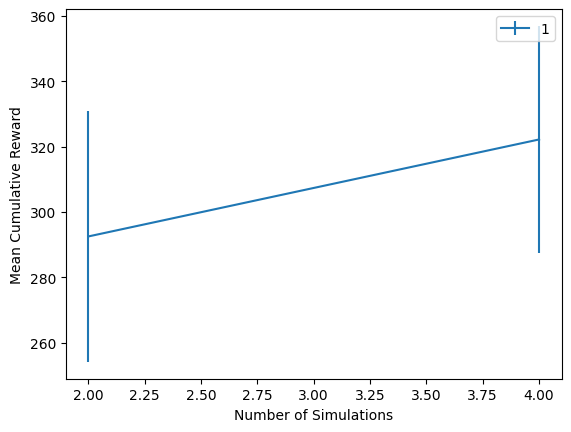

In [16]:
experiment1.run(save=True)
experiment1.show_results()

In [62]:
env = StatelessGym.make('CartPole-v1')
agent = MCTS.mcts_agent(horizon=-1)

rand_experiment = RandomExperiment(env, agent, simulations=[1, 16], temperature=1)
result = rand_experiment.run()
print(result)

ds = rand_experiment.create_dataset(5, "5_dataset")
print(ds)

[1, 13, 500.0]
[['Temperature', 'Simulations', 'Return'], [1, 6, 360.0], [1, 4, 352.0], [1, 15, 302.0], [1, 16, 326.0], [1, 7, 190.0]]


    Temperature  Simulations  Return
0             1            8   308.0
1             1            1     9.0
2             1            2   222.0
3             1           15   324.0
4             1            8   173.0
..          ...          ...     ...
95            1           14   466.0
96            1           15   251.0
97            1           15   271.0
98            1            4   158.0
99            1            1     9.0

[100 rows x 3 columns]
Simulations
1       9.583333
2     262.750000
3     275.666667
4     268.833333
5     322.875000
6     324.666667
7     381.142857
8     364.333333
9     300.500000
10    406.200000
11    271.000000
12    364.400000
13    361.000000
14    440.500000
15    287.400000
16    388.000000
Name: Return, dtype: float64
<PandasArray>
[0.5149286505444373,  96.94457179233915, 105.12056570116683,
  120.3319021152191,   156.776854614631, 142.17547842953323,
 114.61155929403249, 155.16786608917025, 105.97310979677816,
  102.4779651112049, 1

<ErrorbarContainer object of 3 artists>

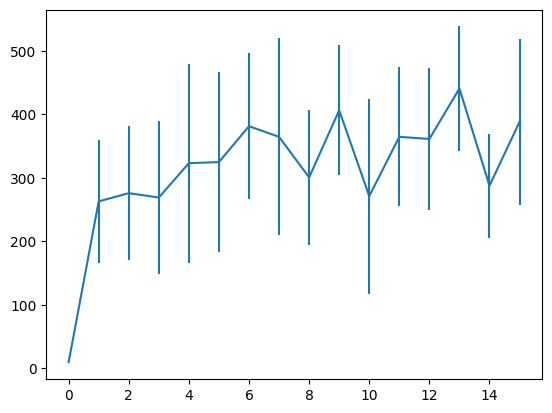

In [61]:
df = pd.read_csv('../datasets/1-100_dataset.csv')
print(df)

group_simulation = df.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

plt.errorbar(list(range(len(group_simulation))),  mean_returns, yerr=std_returns.array)

In [8]:
dataset_name = "Cluster_%d_1-16_1000-Cartpole.csv"
dataset = pd.DataFrame()

for i in range(1, 11):
    dataset = dataset.append(pd.read_csv('../datasets/' + dataset_name % i), ignore_index=True)
    
print(dataset)

      Temperature  Simulations  Return
0               1            1    10.0
1               1            1    10.0
2               1           10   242.0
3               1            6   265.0
4               1           10   261.0
...           ...          ...     ...
9995            1           13   183.0
9996            1            8   500.0
9997            1           14   500.0
9998            1           13   422.0
9999            1           14   500.0

[10000 rows x 3 columns]


<ErrorbarContainer object of 3 artists>

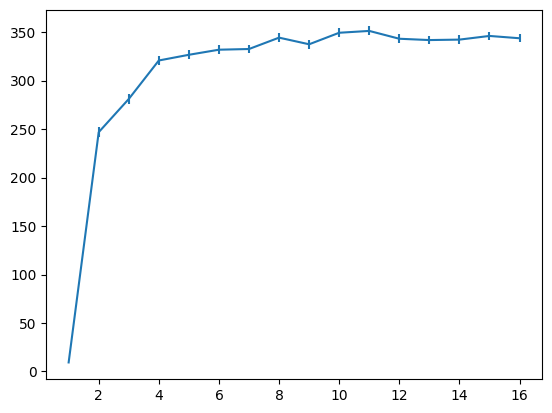

In [12]:
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
error_returns = group_simulation["Return"].std() / (group_simulation["Return"].count() ** 0.5)

plt.errorbar(list(range(1, len(group_simulation) + 1)),  mean_returns, yerr=error_returns.array)

In [15]:
print(mean_returns)
print(group_simulation["Return"].count())
print(error_returns.array)

Simulations
1       9.329159
2     246.732258
3     280.971108
4     320.668350
5     326.543230
6     331.783333
7     332.501587
8     344.219969
9     337.371517
10    349.256281
11    351.153846
12    343.080670
13    341.725309
14    342.190865
15    345.972313
16    343.588502
Name: Return, dtype: float64
Simulations
1     559
2     620
3     623
4     594
5     613
6     660
7     630
8     641
9     646
10    597
11    624
12    657
13    648
14    613
15    614
16    661
Name: Return, dtype: int64
<PandasArray>
[0.03139449071410253,    5.05449060020641,   5.029735500132373,
   4.790646572682777,   4.731724248647235,   4.464581937457762,
  4.3771198386202625,  4.4666225065073615,  4.4117805810952095,
   4.727748558803188,   4.577782588110334,   4.487560488924887,
   4.264466484436226,   4.553716079962356,  4.5528224703232745,
   4.374238922377448]
Length: 16, dtype: float64
